In [2]:
#reading necessary packages
import pandas as pd
import matplotlib.pyplot as plt

## Coding Challenge 3

In [32]:
#read cc3_Avoidable mortality in England and Wales – children and young people.csv
db_mort_children = pd.read_csv('PortfolioData/cc3_Avoidable mortality in England and Wales – children and young people.csv')

#read cc3_Percentage of children, living in a family where no-one is disabled, in relative low income - AHC.csv
db_poverty_children = pd.read_csv('PortfolioData/cc3_Percentage of children, living in a family where no-one is disabled, in relative low income - AHC.csv')

In [ ]:
#head of the data
print(db_mort_children.head())

#turn both into numeric
db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'] = pd.to_numeric(db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'], errors='coerce')

In [33]:
#head of the data
print(db_poverty_children.head())

#turn both columns into numeric
db_poverty_children['pct_lowincome_children'] = pd.to_numeric(db_poverty_children['pct_lowincome_children'], errors='coerce')

   Year  pct_lowincome_children  numbermillions_lowincome_children
0  1994                      32                                4.1
1  1995                      33                                4.2
2  1996                      34                                4.3
3  1997                      33                                4.2
4  1998                      34                                4.3


#### Plotting graph 1

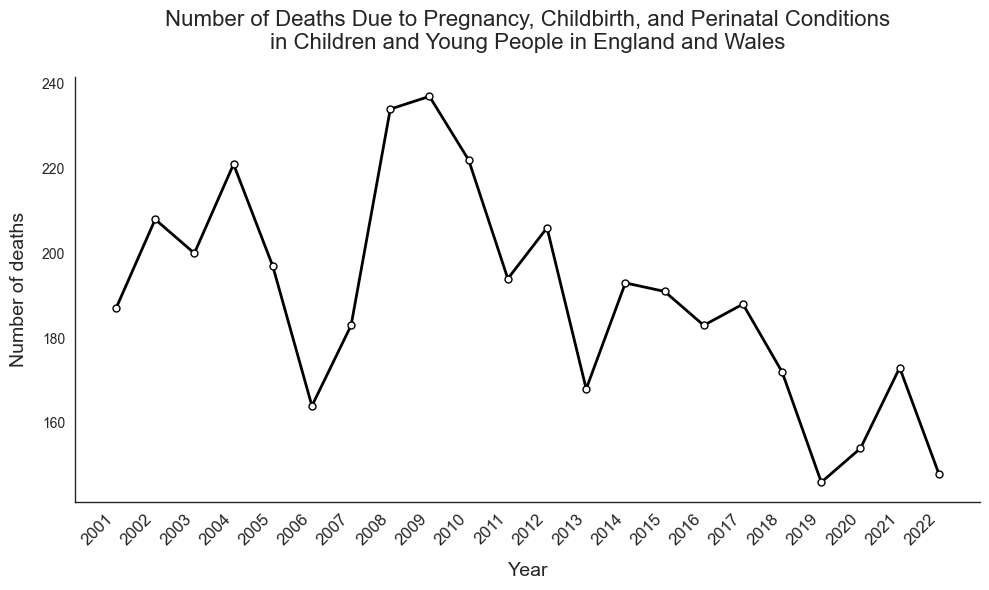

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot: Year on the x-axis, deaths on the y-axis
ax.plot(db_mort_children['Year'], 
        db_mort_children['Ndeaths_Pregnancy_childbirth_perinatal'],
        color='darkred', linewidth=2, marker='o', markersize=5, 
        markerfacecolor='white', markeredgecolor='black')

# Labeling
ax.set_xlabel('Year', fontsize=14, labelpad=10)
ax.set_ylabel('Number of deaths', fontsize=14, labelpad=10)
ax.set_title('Number of Deaths Due to Pregnancy, Childbirth, and Perinatal Conditions\nin Children and Young People in England and Wales', 
             fontsize=16, pad=20)

# Ensure all years are shown on the x-axis
years = db_mort_children['Year']
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=12)  # Rotate if needed for readability

# Remove top and right spines for a minimal look
sns.despine()

# No grid for a clean look
ax.grid(False)

plt.tight_layout()
plt.show()


#### Plotting graph II

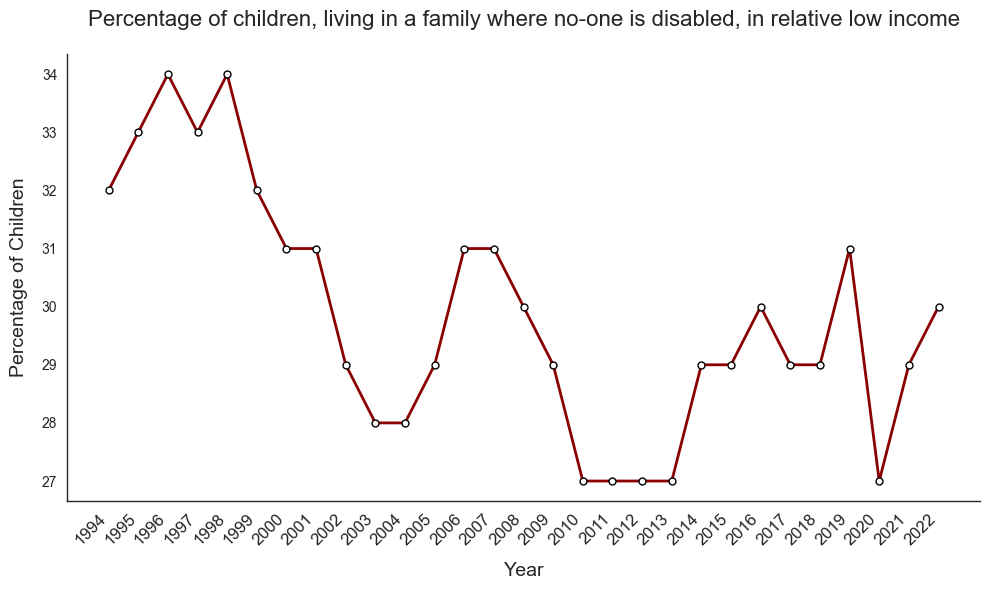

In [35]:
#plot timeseries using the same style as above

import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("white")

fig, ax = plt.subplots(figsize=(10, 6))

# Plot: Year on the x-axis, deaths on the y-axis
ax.plot(db_poverty_children['Year'], 
        db_poverty_children['pct_lowincome_children'],
        color='darkred', linewidth=2, marker='o', markersize=5, 
        markerfacecolor='white', markeredgecolor='black')

# Labeling
ax.set_xlabel('Year', fontsize=14, labelpad=10)
ax.set_ylabel('Percentage of Children', fontsize=14, labelpad=10)
ax.set_title('Percentage of children, living in a family where no-one is disabled, in relative low income', 
             fontsize=16, pad=20)

# Ensure all years are shown on the x-axis
years = db_poverty_children['Year']
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, ha='right', fontsize=12)  # Rotate if needed for readability

# Remove top and right spines for a minimal look
sns.despine()

# No grid for a clean look
ax.grid(False)

plt.tight_layout()
plt.show()
